# 图36 带波峰波谷标记的时序图

下面的时间序列绘制了所有的高峰和低谷，并注释了所选特殊事件的发生。

原代码运行报错`KeyError: 'traffic'`，将`data = df['traffic'].values`改为`data = df['value'].values`

此外，以下代码也要修正(traffic改为value)：
- `plt.plot('date', 'traffic', data=df, color='tab:blue', label='Air Traffic')`
- `plt.scatter(df.date[peak_locations], df.traffic[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')`
- `plt.scatter(df.date[trough_locations], df.traffic[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')`
- `plt.text(df.date[p], df.traffic[p] + 15, df.date[p], horizontalalignment='center', color='darkgreen')`
- `plt.text(df.date[t], df.traffic[t] - 35, df.date[t], horizontalalignment='center', color='darkred')`

说明：日期格式和原代码用的不同.

1.23.5
2.0.0
3.7.1
0.12.2


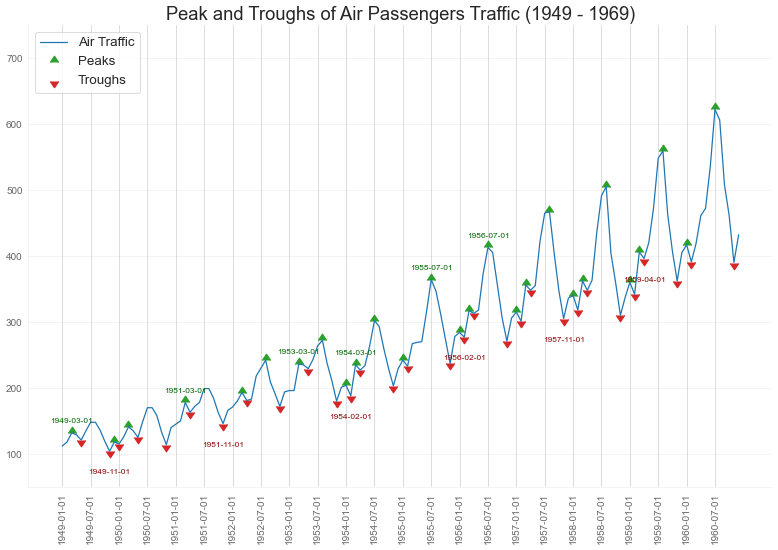

In [1]:
from doc.Plot.require import *

# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
# df = pd.read_csv('../data/air_passengers.csv')

# Get the Peaks and Troughs
data = df['value'].values
double_diff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(double_diff == -2)[0] + 1

double_diff2 = np.diff(np.sign(np.diff(-1 * data)))
trough_locations = np.where(double_diff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(16, 10), dpi=60)
plt.plot('date', 'value', data=df, color='tab:blue', label='Air Traffic')
plt.scatter(df.date[peak_locations], df.value[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green',
            s=100, label='Peaks')
plt.scatter(df.date[trough_locations], df.value[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red',
            s=100, label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df.date[p], df.value[p] + 15, df.date[p], horizontalalignment='center', color='darkgreen')
    plt.text(df.date[t], df.value[t] - 35, df.date[t], horizontalalignment='center', color='darkred')

# Decoration
plt.ylim(50, 750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.date.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=0.7)
plt.title("Peak and Troughs of Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.yticks(fontsize=12, alpha=0.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(0.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.show()